In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from network import *
from config import *
from plot import *

### Uniform Network


In [3]:
uniform_network = CorticalNetwork(equation, N_exc, N_inh, V, taus, mus, J_uniform, P_uniform, is_cluster=False)
state_monitor_uniform_network, spike_monitor_uniform_network, spike_train_uniform_network = uniform_network.run_network(duration, N_realizations, N_trials)

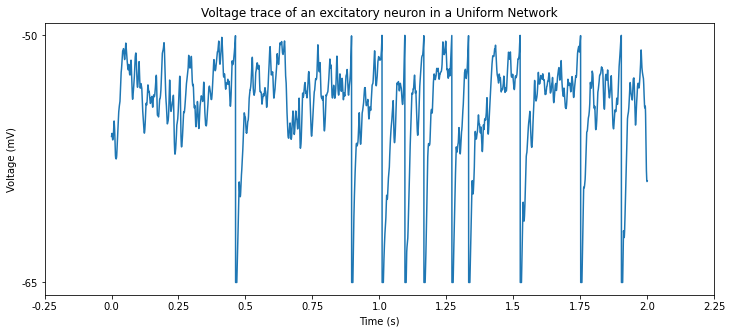

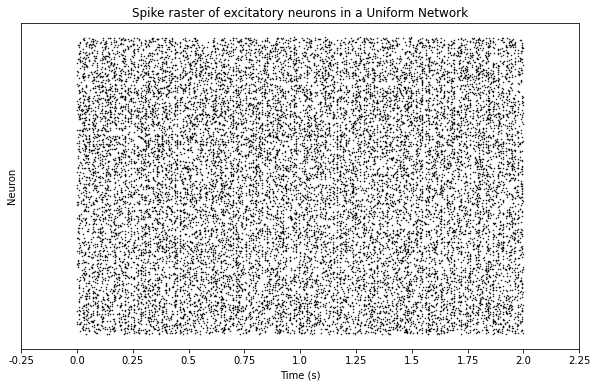

In [12]:
voltage_trace_plot(state_monitor_uniform_network, 1, network_type='Uniform')
spike_raster_plot(spike_monitor_uniform_network, 1, network_type='Uniform')

### Clustered Network

In [27]:
cluster_network = CorticalNetwork(equation, N_exc, N_inh, V, taus, mus, J_cluster, P_cluster, N_cluster=N_cluster, is_cluster=True)
state_monitor_cluster_network, spike_monitor_cluster_network, spike_train_cluster_network = cluster_network.run_network(duration, N_realizations, N_trials)

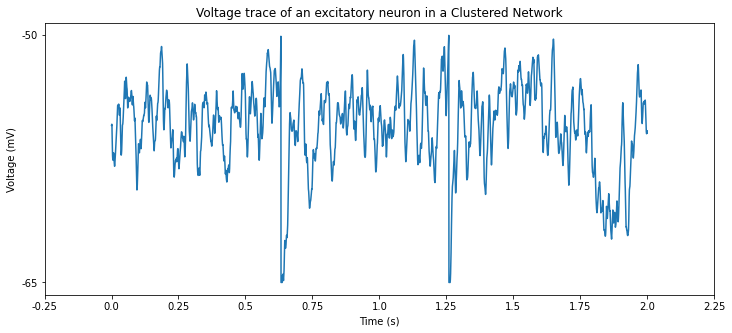

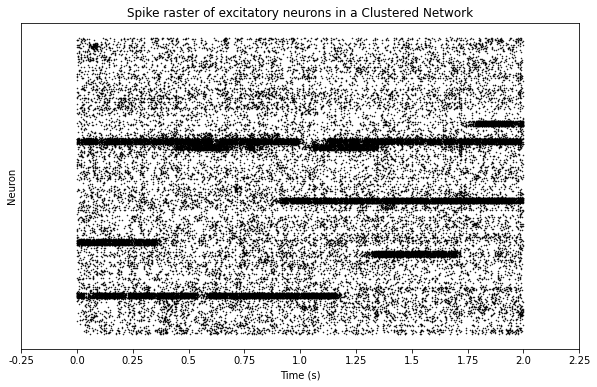

In [28]:
voltage_trace_plot(state_monitor_cluster_network, 1, network_type='Clustered')
spike_raster_plot(spike_monitor_cluster_network, 1, network_type='Clustered')

#the current rastor plot is for 4000 neurons and hence it is pretty dense

### Analysis


In [19]:
# histogram for uniform network

after_duration = 1.5

counts = np.zeros((N_realizations,N_trials,N_exc))
for nr in range(N_realizations):
    for nt in range(N_trials):
        for key in spike_train_uniform_network[nr][nt]:
            counts[nr][nt][key] = np.sum(spike_train_uniform_network[nr][nt][key]/second>after_duration)
            
flat_rate = np.asarray(np.mean(counts,axis=1)/after_duration).flatten()

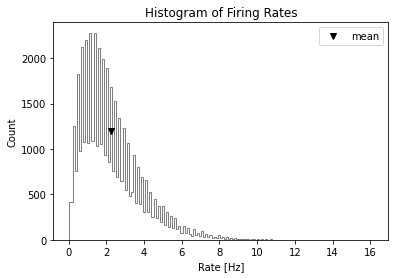

In [25]:
plt.hist(x=flat_rate, bins='auto',histtype='step', color='grey')
plt.xlabel('Rate [Hz]') 
plt.ylabel('Count')
plt.title("Histogram of Firing Rates")
plt.plot(np.mean(flat_rate), plt.ylim()[1]/2, 'v', color = 'black', label='mean')
plt.legend()
plt.show()